Adrien MOREL

# Contrôle continu

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Partie I

In [129]:
tau = 0.5

n = np.arange(0,51)
t_n = [i + tau*np.sqrt(i) for i in n]

print(f' t1 = 1.5 : {t_n[1] == 1.5}, t4 = 5 : {t_n[4] == 5}, t9 = 10.5 : {t_n[9] == 10.5},  t16 = 18 : {t_n[16] == 18},  t25 = 27.5 : {t_n[25] == 27.5}')


 t1 = 1.5 : True, t4 = 5 : True, t9 = 10.5 : True,  t16 = 18 : True,  t25 = 27.5 : True


On remarque que notre liste de t est surement bien construite car les valeurs que l'on a vérifiées sont les bonnes.

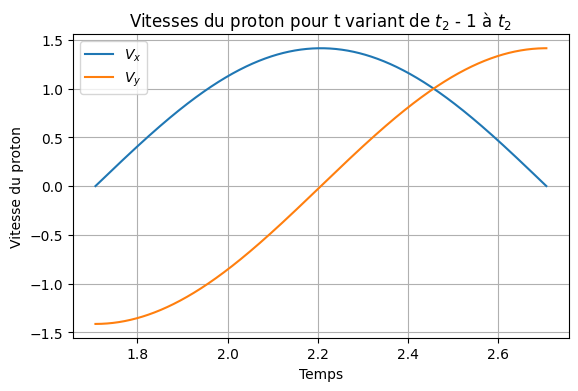

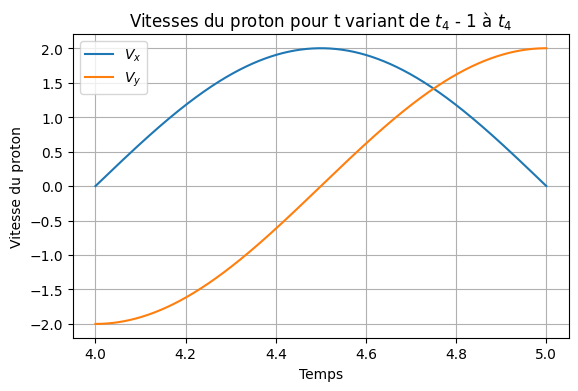

In [43]:
t_2 = np.linspace(t_n[2]-1,t_n[2],1000)

Vx_2 = [-1*np.sqrt(2)*np.sin(np.pi*(i - t_n[2] )) for i in t_2]
Vy_2 = [np.sqrt(2)*np.cos(np.pi*(i - t_n[2] )) for i in t_2]

t_4 = np.linspace(t_n[4]-1,t_n[4],1000)

Vx_4 = [-1*np.sqrt(4)*np.sin(np.pi*(i - t_n[4] )) for i in t_4]
Vy_4 = [np.sqrt(4)*np.cos(np.pi*(i - t_n[4] )) for i in t_4]


plt.subplot(2,1,1)
plt.subplots_adjust(top = 1.5)

plt.plot(t_2,Vx_2,label=r"$V_x$")
plt.plot(t_2,Vy_2,label=r"$V_y$")
plt.xlabel("Temps")
plt.ylabel("Vitesse du proton")
plt.title(r'Vitesses du proton pour t variant de $t_2$ - 1 à $t_2$ ')
plt.legend()
plt.grid()
plt.show()

plt.subplot(2,1,2)
plt.subplots_adjust(top = 1.5)

plt.plot(t_4,Vx_4,label=r"$V_x$")
plt.plot(t_4,Vy_4,label=r"$V_y$")
plt.xlabel("Temps")
plt.ylabel("Vitesse du proton")
plt.title(r'Vitesses du proton pour t variant de $t_4$ - 1 à $t_4$ ')
plt.legend()
plt.grid()
plt.show()

In [62]:
def maxima(l):
    ind = 0
    maxi = 0
    for i in range(1,len(l)):
        if l[i-1] < l[i]:
            maxi = l[i]
            ind = i
    return maxi,ind

print(f"Les maximums de Vx et Vy pour t variant de t2 - 1 à t2 sont {round(maxima(Vx_2)[0],3)} et {round(maxima(Vy_2)[0],3)} atteints à t = {round(t_2[maxima(Vx_2)[1]],3)} et t = {round(t_2[maxima(Vy_2)[1]],3)} respectivement")
print(f"Les maximums de Vx et Vy pour t variant de t4 - 1 à t4 sont {round(maxima(Vx_4)[0],3)} et {round(maxima(Vy_4)[0],3)} atteints à t = {round(t_4[maxima(Vx_4)[1]],3)} et t = {round(t_4[maxima(Vy_4)[1]],3)} respectivement")

Les maximums de Vx et Vy pour t variant de t2 - 1 à t2 sont 1.414 et 1.414 atteints à t = 2.207 et t = 2.707 respectivement
Les maximums de Vx et Vy pour t variant de t4 - 1 à t4 sont 2.0 et 2.0 atteints à t = 4.501 et t = 5.0 respectivement


On remarque que pour t variant de $t_{n+1} - 1$ à $t_{n+1}$, les vitesses selon x et y ont le même maximums, 2.0 pour n = 3 et 1.414 pour n = 1.
Avant même de calculer les maximums, on pouvait voir sur le graphique que les courbes pour n = 1 et n = 3 sont très similaires et que les vitesses selon x et y ont le même maximum.

---

## Partie II

(0, 2.0)


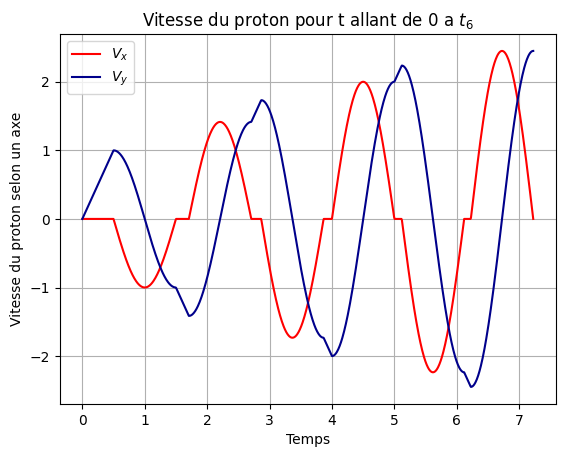

In [121]:
def v(t,n):
    global t_n,tau
    for i in range(n):
        if t>=t_n[i] and t<=t_n[i+1] - 1:
            vx = 0
            vy = ((-1)**i)*(np.sqrt(i) + (t - t_n[i])/tau)
        if t>=t_n[i+1] -1 and t<=t_n[i+1]:
            vx = ((-1)**i)*(np.sqrt(i+1)*np.sin(np.pi*(t - t_n[i+1])))
            vy = ((-1)**(i+1))*(np.sqrt(i+1)*np.cos(np.pi*(t - t_n[i+1])))
    return vx,vy

print(v(5,6))

t_l = np.linspace(0,t_n[6],1000)

vx = [v(i,6)[0] for i in t_l]
vy = [v(i,6)[1] for i in t_l]

plt.plot(t_l,vx,label=r"$V_x$",color="red")
plt.plot(t_l,vy,label=r"$V_y$",color="darkblue")
plt.grid()
plt.xlabel("Temps")
plt.ylabel("Vitesse du proton selon un axe")
plt.title("Vitesse du proton pour t allant de 0 a $t_6$")
plt.legend()
plt.show()


On remarque bien que malgré les définition de $v_x$ et $v_y$ différentes selon t, on retrouve bien deux courbes continues, ce qui semble logique parceque ce ne serait pas possible physiquement d'avoir des vitesses discontinues. Regardons pour le module de la vitesse : 

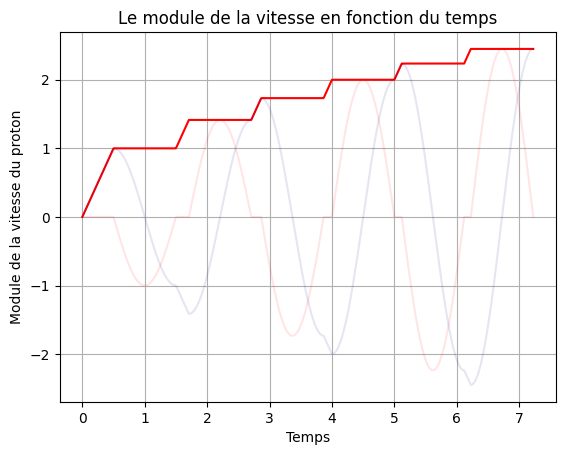

In [123]:
v_mod = [np.sqrt(i**2 + j**2) for (i,j) in zip(vx,vy)]

plt.plot(t_l,v_mod,color="red")
plt.plot(t_l,vx,label=r"$V_x$",color="red",alpha=0.1)
plt.plot(t_l,vy,label=r"$V_y$",color="darkblue",alpha=0.1)
plt.xlabel("Temps")
plt.ylabel("Module de la vitesse du proton")
plt.title("Le module de la vitesse en fonction du temps")
plt.grid()

On remarque que la vitesse est donc constante par paliers, la vitesse reste une fonction croissante mais avec des "paliers" constants, l'utilisation du cyclotron ne me paraît pas évidente avec ce résultat, je n'ai donc pas d'hypothèse sur l'utilité d'un cyclotron.

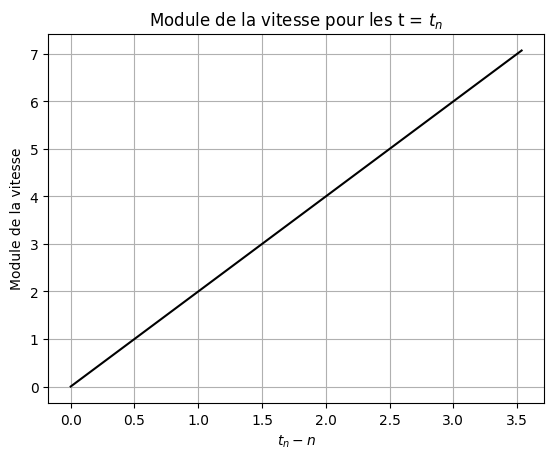

In [135]:
tn_moins_n = np.array(np.array(t_n) - np.array(n))

vx_tn = [v(i,50)[0] for i in t_n]
vy_tn = [v(i,50)[1] for i in t_n]

v_tn_mod = [np.sqrt(i**2 + j**2) for (i,j) in zip(vx_tn,vy_tn)]

plt.plot(tn_moins_n,v_tn_mod,"k")
plt.xlabel("$t_n - n$")
plt.title("Module de la vitesse pour les t = $t_n$")
plt.ylabel("Module de la vitesse")
plt.grid()

La courbe des $\sqrt{v_x(t_n)^2+v_y(t_n)^2}$ en fonction des $t_n - n$ est une droite, ce qui veut dire que la vitesse n'est pas constante que quand le proton est entre les D.